### Two Way Anova:

In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# create a dataset
df= pd.DataFrame({'water':np.repeat(['daily','weekly'],15), 
                   'sun': np.tile(np.repeat(['low','medium','high'],5),2),
                   'height':[6,6,6,5,6,5,5,6,4,5,
                             6,6,7,8,7,3,4,4,4,5,
                             4,4,4,4,4,5,6,6,7,8]})
df

,water,sun,height
0,daily,low,6
1,daily,low,6
2,daily,low,6
3,daily,low,5
4,daily,low,6
5,daily,medium,5
6,daily,medium,5
7,daily,medium,6
8,daily,medium,4
9,daily,medium,5


#### if we see below boxplot then it perfect for one way anova

C:\Users\CU-43\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sun', ylabel='height'>

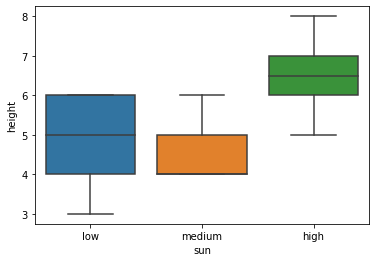

In [4]:
sns.boxplot(df.sun,df.height)

C:\Users\CU-43\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sun', ylabel='height'>

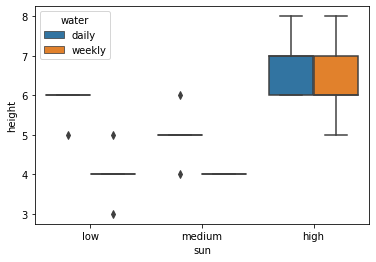

In [5]:
sns.boxplot(df.sun,df.height,hue=df.water)

### yai opar wali example perfect hai 2 way anova ka liya kyun kai
### sun kai three groups + water ke two groups so we have:
### two independent varable and one dependent var i.e height 

In [6]:
df.iloc[:,0:2]

,water,sun
0,daily,low
1,daily,low
2,daily,low
3,daily,low
4,daily,low
5,daily,medium
6,daily,medium
7,daily,medium
8,daily,medium
9,daily,medium


In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# implementin one way anova
model=ols('height ~ sun', data=df).fit()
sm.stats.anova_lm(model,type=2)



,df,sum_sq,mean_sq,F,PR(>F)
sun,2.0,24.866667,12.433333,14.105042,0.000064
Residual,27.0,23.800000,0.881481,NaN,NaN


In [8]:
# implementin two way anova
model=ols('height ~ C(sun) + C(water) + C(sun) : C(water)', data=df).fit()
sm.stats.anova_lm(model,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(sun),2.0,24.866667,12.433333,23.3125,0.000002
C(water),1.0,8.533333,8.533333,16.0000,0.000527
C(sun):C(water),2.0,2.466667,1.233333,2.3125,0.120667
Residual,24.0,12.800000,0.533333,NaN,NaN


In [9]:
# second method for 2 way anova
import pingouin as pg
two_aov=pg.anova(data=df,dv='height',between=['sun','water'],detailed=True)
print(two_aov)

        Source         SS  DF         MS        F     p-unc       np2
0          sun  24.866667   2  12.433333  23.3125  0.000002  0.660177
1        water   8.533333   1   8.533333  16.0000  0.000527  0.400000
2  sun * water   2.466667   2   1.233333   2.3125  0.120667  0.161572
3     Residual  12.800000  24   0.533333      NaN       NaN       NaN


In [10]:
# assinment : Tuckey test kaisa laana hai two way anova par?
# lettering or grouping kaise karni hai ?
#Annotation kaisa karni hai rahs mai?
# time 12:50

In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison


In [ ]:
# then calculate tuckey test
tck=pg.pairwise_tukey(data=df,dv='height',between='sun')

print(tck)
# agar p-tuckey ki value 0.05 se kam ou nulll hp rejected

      A       B  mean(A)  mean(B)  diff        se         T   p-tukey  \
0  high     low      6.6      4.9   1.7  0.419877  4.048809  0.001098   
1  high  medium      6.6      4.5   2.1  0.419877  5.001470  0.000088   
2   low  medium      4.9      4.5   0.4  0.419877  0.952661  0.612400   

     hedges  
0  1.734175  
1  2.142216  
2  0.408041  


In [18]:
# then calculate tuckey test
tck1=pg.pairwise_tukey(data=df,dv='height',between='water')

print(tck1)
# agar p-tuckey ki value 0.05 se kam ou nulll hp rejected

       A       B   mean(A)  mean(B)      diff        se         T   p-tukey  \
0  daily  weekly  5.866667      4.8  1.066667  0.437163  2.439977  0.021276   

     hedges  
0  0.866874  


In [73]:
tck1=pg.pairwise_tukey(data=df,dv='height',between='mixing')

print(tck1)

                 A                B  mean(A)  mean(B)  diff       se  \
0     daily , high      daily , low      6.8      5.8   1.0  0.46188   
1     daily , high   daily , medium      6.8      5.0   1.8  0.46188   
2     daily , high    weekly , high      6.8      6.4   0.4  0.46188   
3     daily , high     weekly , low      6.8      4.0   2.8  0.46188   
4     daily , high  weekly , medium      6.8      4.0   2.8  0.46188   
5      daily , low   daily , medium      5.8      5.0   0.8  0.46188   
6      daily , low    weekly , high      5.8      6.4  -0.6  0.46188   
7      daily , low     weekly , low      5.8      4.0   1.8  0.46188   
8      daily , low  weekly , medium      5.8      4.0   1.8  0.46188   
9   daily , medium    weekly , high      5.0      6.4  -1.4  0.46188   
10  daily , medium     weekly , low      5.0      4.0   1.0  0.46188   
11  daily , medium  weekly , medium      5.0      4.0   1.0  0.46188   
12   weekly , high     weekly , low      6.4      4.0   2.4  0.4

In [47]:
df['mixing']= df.water+" , "+df.sun

# we will perform tuckeys Multiple comparsion
multi_comparision = pairwise_tukeyhsd(endog=df.height, groups=df.mixing, alpha=0.05)
print(multi_comparision)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1          group2     meandiff p-adj   lower   upper  reject
---------------------------------------------------------------------
  daily , high     daily , low     -1.0 0.2898 -2.4281  0.4281  False
  daily , high  daily , medium     -1.8 0.0079 -3.2281 -0.3719   True
  daily , high   weekly , high     -0.4  0.951 -1.8281  1.0281  False
  daily , high    weekly , low     -2.8    0.0 -4.2281 -1.3719   True
  daily , high weekly , medium     -2.8    0.0 -4.2281 -1.3719   True
   daily , low  daily , medium     -0.8 0.5252 -2.2281  0.6281  False
   daily , low   weekly , high      0.6 0.7827 -0.8281  2.0281  False
   daily , low    weekly , low     -1.8 0.0079 -3.2281 -0.3719   True
   daily , low weekly , medium     -1.8 0.0079 -3.2281 -0.3719   True
daily , medium   weekly , high      1.4  0.057 -0.0281  2.8281  False
daily , medium    weekly , low     -1.0 0.2898 -2.4281  0.4281  False
daily , medium weekl

In [72]:
# tuckey to a dataframe:
tucky_df= pd.DataFrame(data=multi_comparision._results_table.data[:], columns=multi_comparision._results_table.data[0])
tucky_df

,group1,group2,meandiff,p-adj,lower,upper,reject
0,group1,group2,meandiff,p-adj,lower,upper,reject
1,"daily , high","daily , low",-1.0,0.2898,-2.4281,0.4281,False
2,"daily , high","daily , medium",-1.8,0.0079,-3.2281,-0.3719,True
3,"daily , high","weekly , high",-0.4,0.951,-1.8281,1.0281,False
4,"daily , high","weekly , low",-2.8,0.0,-4.2281,-1.3719,True
5,"daily , high","weekly , medium",-2.8,0.0,-4.2281,-1.3719,True
6,"daily , low","daily , medium",-0.8,0.5252,-2.2281,0.6281,False
7,"daily , low","weekly , high",0.6,0.7827,-0.8281,2.0281,False
8,"daily , low","weekly , low",-1.8,0.0079,-3.2281,-0.3719,True
9,"daily , low","weekly , medium",-1.8,0.0079,-3.2281,-0.3719,True


In [71]:
Group1= tucky_df.loc[tucky_df.reject== True].groupby('group1').reject.count()
Group2= tucky_df.loc[tucky_df.reject== True].groupby('group2').reject.count()
Group2
tucky_df1= pd.concat([Group1,Group2],axis=1)
tucky_df1=tucky_df1.fillna(0)


In [69]:
Group2= tucky_df.loc[tucky_df.reject== True]
Group2

,group1,group2,meandiff,p-adj,lower,upper,reject
2,"daily , high","daily , medium",-1.8,0.0079,-3.2281,-0.3719,True
4,"daily , high","weekly , low",-2.8,0.0,-4.2281,-1.3719,True
5,"daily , high","weekly , medium",-2.8,0.0,-4.2281,-1.3719,True
8,"daily , low","weekly , low",-1.8,0.0079,-3.2281,-0.3719,True
9,"daily , low","weekly , medium",-1.8,0.0079,-3.2281,-0.3719,True
13,"weekly , high","weekly , low",-2.4,0.0003,-3.8281,-0.9719,True
14,"weekly , high","weekly , medium",-2.4,0.0003,-3.8281,-0.9719,True


In [ ]:
# If significant based on ANOVA, we run Tukey test to rank means. For example we have four treatments with treatment averages = T1 23 ; T2 25; T3 19; T4 5. After mean ranking by post-hoc test (Tukey test), output might be:
# T2 25 A
# T1 23 AB
# T3 19 B
# T4 5 C
# The ranking is designated by letters. I am referring to these as letterin